# Dataset Info.

### train.csv [파일]
- ID : 대구에서 발생한 교통사고의 고유 ID -2019년부터 2021년까지의 교통사고 데이터로 구성
- 해당 사고가 발생한 당시의 시공간 정보와 사고 관련 정보 포함
- ECLO : 인명피해 심각도
  - ※ ECLO(Equivalent Casualty Loss Only) : 인명피해 심각도
    ECLO = 사망자수 * 10 + 중상자수 * 5 + 경상자수 * 3 + 부상자수 * 1

  
### test.csv [파일]
- ID : 대구에서 발생한 교통사고의 고유 ID
- 2022년도의 교통사고 데이터로 구성
- 추론 시점에서 획득할 수 있는 정보로 구성

### sample_submission.csv [파일] - 제출 양식
- ID : 추론 샘플의 고유 ID
- ECLO : 예측한 인명피해 심각도

### 대구 빅데이터 마트 데이터 [폴더]
- 대구 빅데이터활용센터에서 구축한 빅데이터 마트 데이터 중 제공 가능한 일부 데이터셋
- 상세한 명세는 폴더 내부의 빅데이터 마트 데이터 설명서.hwp 참고
- 전체 빅데이터 마트 데이터셋을 활용하기 위해서는 대구 빅데이터활용센터 방문 필요

### countrywide_accident.csv [파일]
- 대구를 제외한 전국에서 발생한 교통사고 데이터
- 2019년부터 2021년까지의 교통사고 데이터로 구성
- train.csv와 양식 동일

### 대구 보안등 정보.csv [파일]
- 대구에 존재하는 보안등 관련 정보

### 대구 어린이 보호 구역 정보.csv [파일]
- 대구에 존재하는 어린이 보호 구역 관련 정보

### 대구 주차장 정보.csv [파일]
- 대구에 존재하는 주차장 관련 정보

### 대구 CCTV 정보.csv [파일]
- 대구에 존재하는 CCTV 관련 정보

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.rcParams['font.family'] ='Malgun Gothic'

### train.csv

In [3]:
train_df = pd.read_csv('data/train.csv')
train_df.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


### 결측치 확인

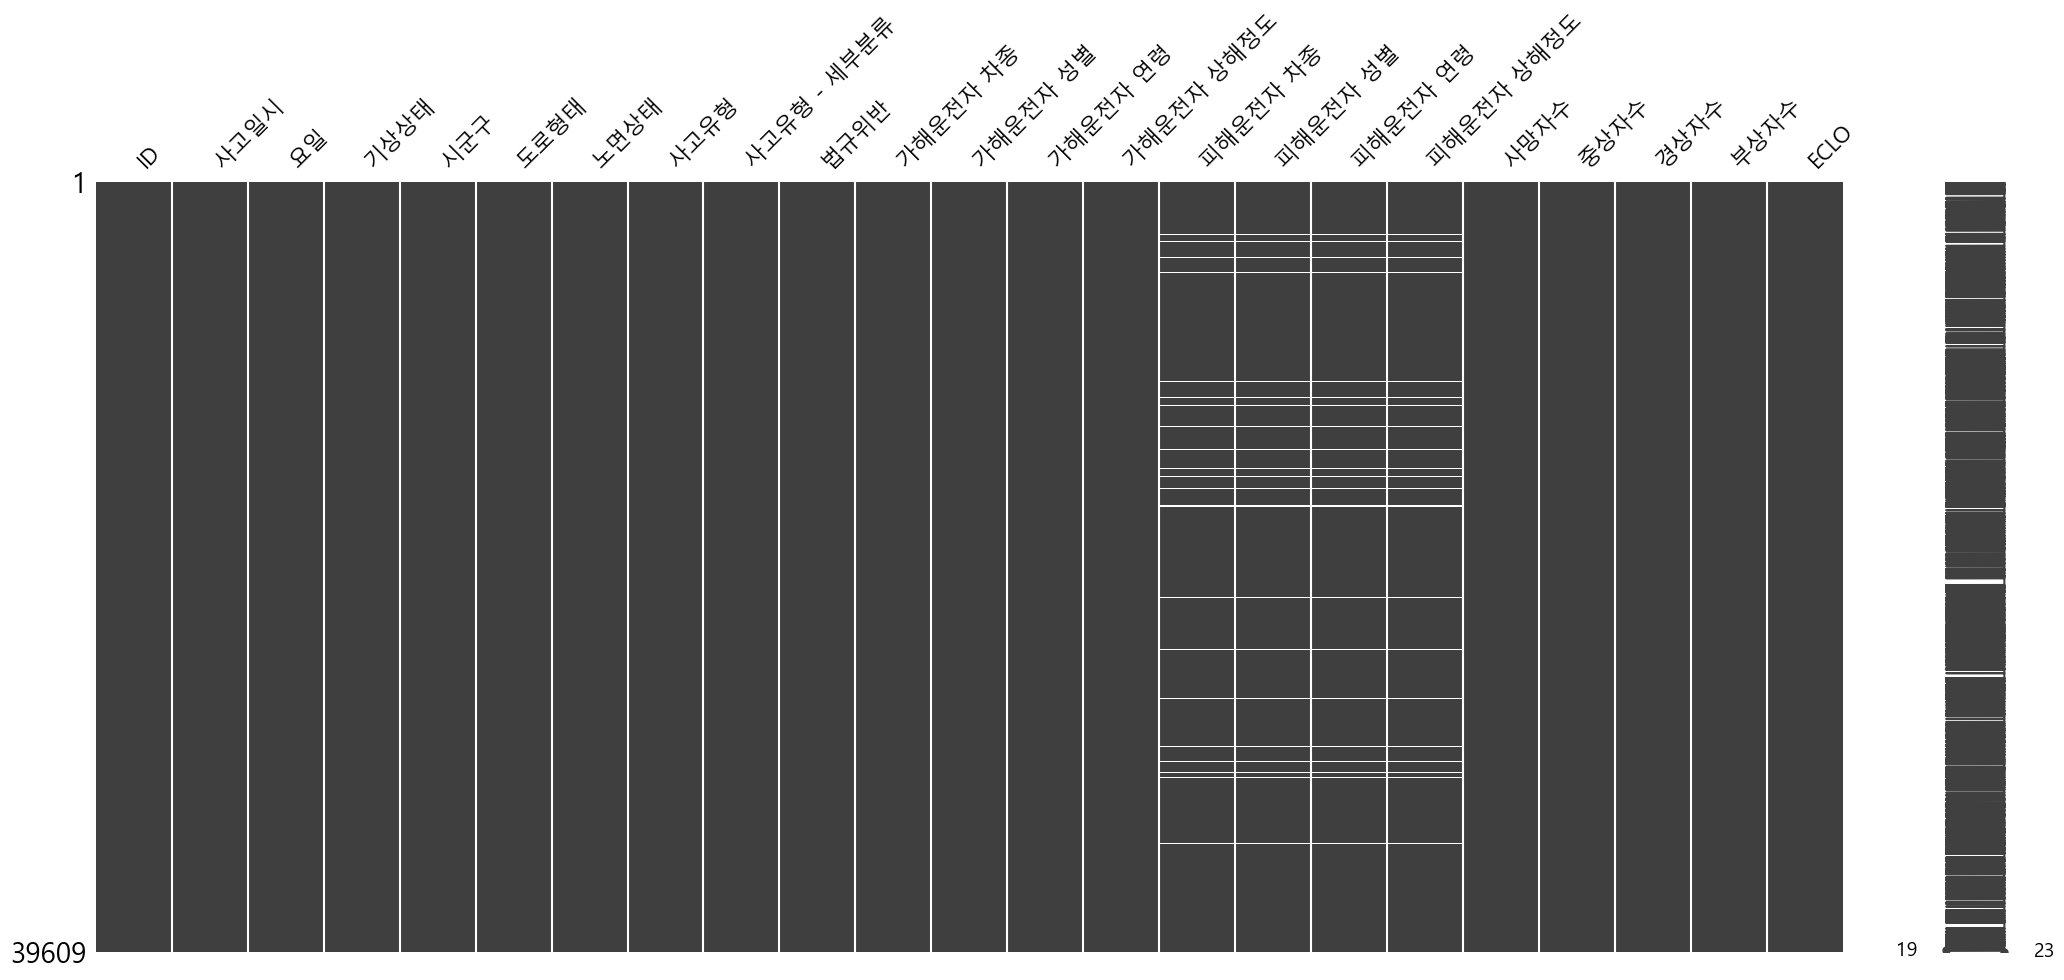

In [16]:
msno.matrix(train_df)
plt.show()

## ECLO 분포 확인
- 왼쪽으로 치우친 분포 -> ECLO가 극단적으로 큰 값에 너무 영향을 받지 않기 위해 median값을 대푯값으로 사용하여 시각화

<Axes: xlabel='ECLO', ylabel='Density'>

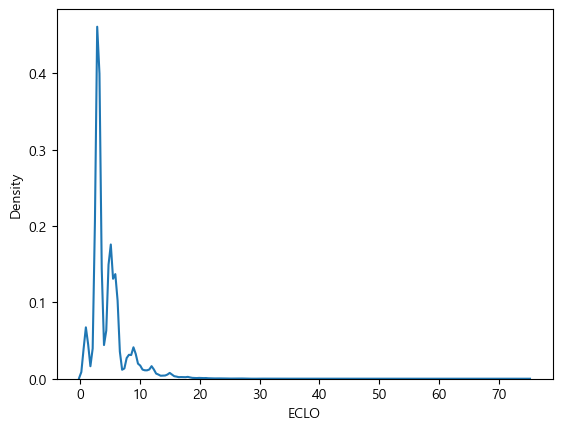

In [43]:
sns.kdeplot(data = train_df, x='ECLO')

## 변수 생성
- 시간대 : 사고 일시에서 시간대 추출
- 새벽 : 00시 ~ 06시 - 새벽 / 그외 
- 연령 : ~10대, 10대, 20대, 30대, ..., 90대

In [4]:
train_df['시간대'] = train_df['사고일시'].apply(lambda x : x.split(' ')[1])
train_df['새벽'] = np.where(train_df['시간대'] <= '06','새벽','그 외')

train_df['피해운전자 연령_int'] = train_df['피해운전자 연령'].fillna('-1세').str.replace('미분류', '-1세').apply(lambda x : x.split('세')[0]).astype(int)
train_df['가해운전자 연령_int'] = train_df['가해운전자 연령'].fillna('-1세').str.replace('미분류', '-1세').apply(lambda x : x.split('세')[0]).astype(int)
train_df['가해운전자 연령_cat'] = pd.cut(train_df['가해운전자 연령_int'], bins = [0,10,20,30,40,50,60,70,80,90,100], labels = ['~10대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대'])
train_df['피해운전자 연령_cat'] = pd.cut(train_df['피해운전자 연령_int'], bins = [0,10,20,30,40,50,60,70,80,90,100], labels = ['~10대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대'])

## 어떤 것들이 ECLO에 영향을 미칠까?

- 시간대 
  - **새벽** 시간대에 큰 사고가 더 많이 날 것이다. 
  - **출근** 시간대에 차량 복잡도가 높아지면서 사고가 많이 날 것이다. 
  
- 연령 : **나이대가 높을수록** 사고 심각도가 높아질 것이다. 

- 날씨 : **눈/비**가 오면 사고 확률이 높아질 것이다. 

- 법규 위반 : **CCTV가 적은 지역**에서 사고가 더 많이 날 것이다.
  - 어린이 보호 구역에서는 사고가 더 적을까?

- ECLO : 사망, 경상, 중상이 발생하는 경우는 다를 것이다.
  - ECLO = 사망자수 * 10 + 중상자수 * 5 + 경상자수 * 3 + 부상자수 * 1
  - 부상자수 30명의 경우 != 사망자 3명인 경우
  - 따라서, 각 경우에 따라 영향을 미치는 요소를 확인해보자.

C:\Users\yunhy\AppData\Local\Temp\ipykernel_23888\4220371455.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp1 = train_df.groupby(col[i]).size().reset_index().sort_values(by = col[i]).rename(columns = {0 : 'cnt'})
C:\Users\yunhy\AppData\Local\Temp\ipykernel_23888\4220371455.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp2 = train_df.groupby(col[i])['ECLO'].mean().reset_index().sort_values(by = col[i])
C:\Users\yunhy\AppData\Local\Temp\ipykernel_23888\4220371455.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obse

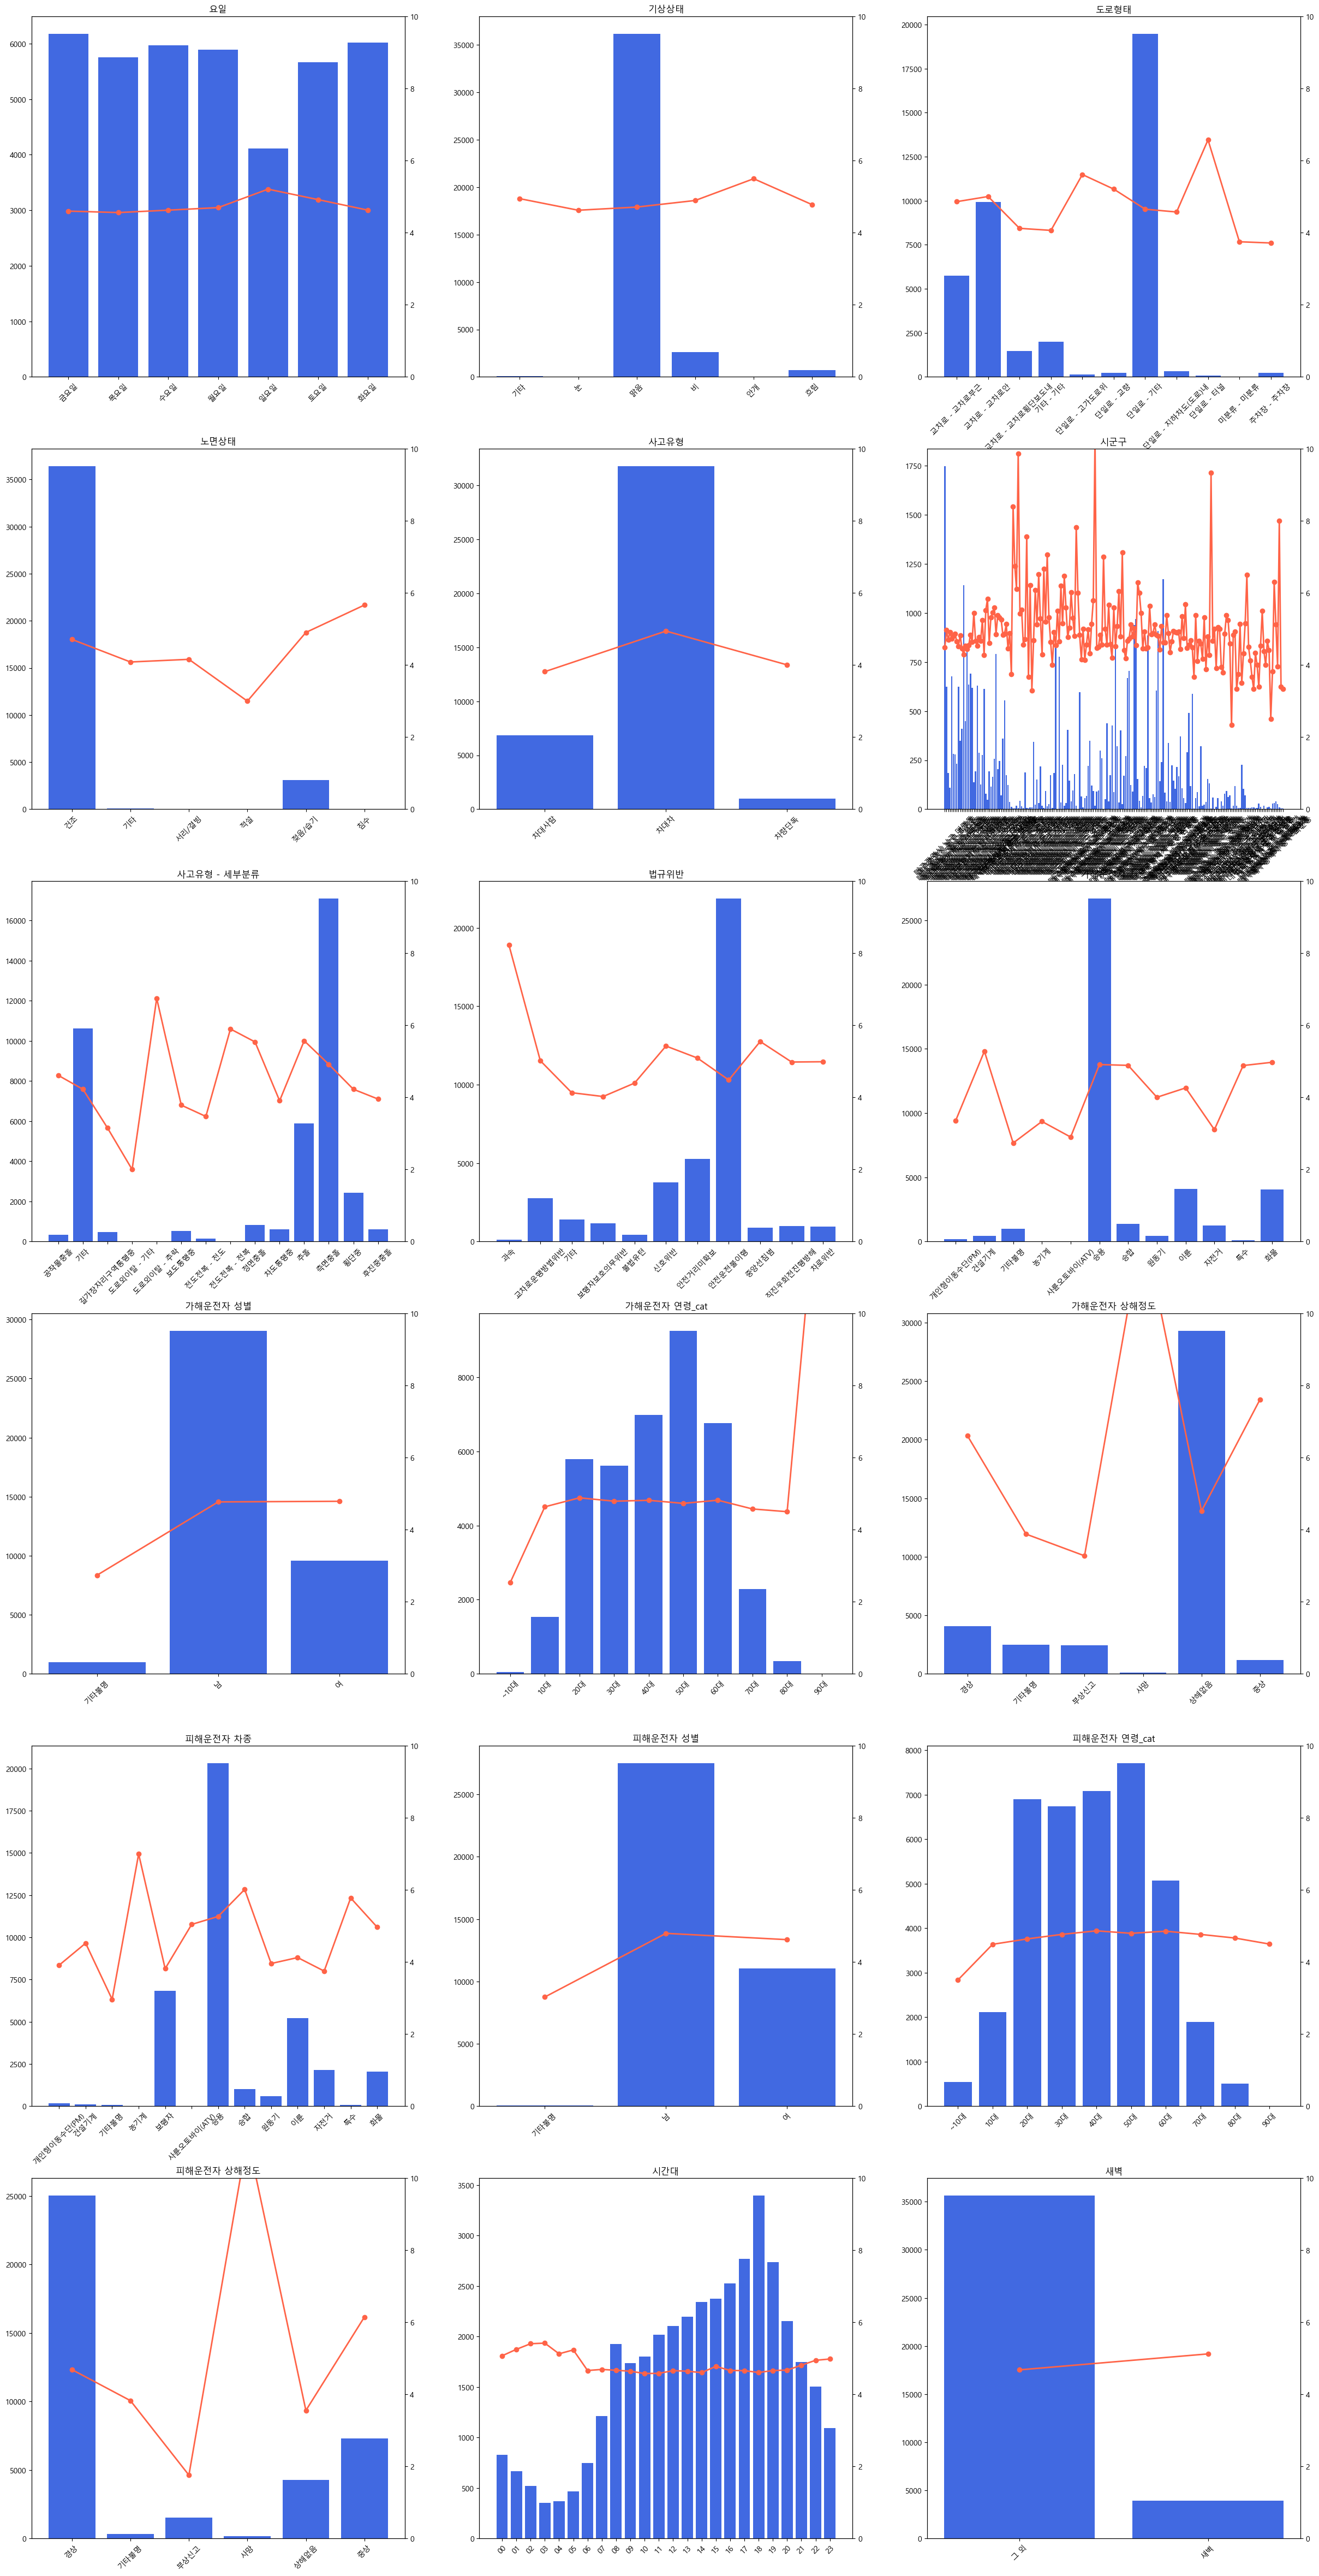

In [275]:
col = ['요일', '기상상태', '도로형태', '노면상태', '사고유형', '시군구',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령_cat', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령_cat', '피해운전자 상해정도', '시간대', '새벽']
fig, axes = plt.subplots(6,3, figsize = (30,60))
for i,ax in enumerate(axes.flat):
       if i >= len(col):
              break
       temp1 = train_df.groupby(col[i]).size().reset_index().sort_values(by = col[i]).rename(columns = {0 : 'cnt'})
       temp2 = train_df.groupby(col[i])['ECLO'].mean().reset_index().sort_values(by = col[i])
       temp = temp1.merge(temp2)
       idx = np.arange(len(temp.index))
       ax.bar(temp[col[i]], temp['cnt'],
           color='royalblue')
       
       
       ax2 = ax.twinx()
       ax2.plot(temp[col[i]], temp['ECLO'],
              color='tomato', linewidth = 2, marker = 'o')
       ax2.set_ylim(0,10)
       ax.set_title(col[i])
       ax.tick_params(axis='x', rotation=45)

## 지금까지 확인한 사실들..

- 시간대
  - 새벽 시간대에 사고 발생 횟수는 적지만 ECLO가 큰 사고가 많이 발생한다.
  - 퇴근 시간대(?)에 사고 발생 횟수가 많다. 
  - 주말에 ECLO가 크게 나타나는 편이다.

- 연령
  - 70대 이상의 노인이 피해자인 경우 ECLO가 크게 나타난다.
  
- 날씨
  - 안개가 꼈을 때 ECLO가 커지지만 빈도가 극히 적은편
  - 대구는 눈이 거의 안쌓여서 눈으로 인한 사고가 생각보다 많지 않다.


### 1. 시간대에 따라 사고 심각도가 차이나는 이유는 무엇일까
- 법규 위반 : 새벽 시간에 안전 운정 불이행, 신호위반이 그 외 시간대보다 살짝 높게 나타난다.
- 날씨 : 그 외 시간대보다는 비,흐림인 경우가 조금더 많다..
- 차종 : 사고는 많이 없지만 특수, 원동기, 화물 차량에서 ECLO가 크게 나타난 사고가 있는 듯 하다.

In [276]:
temp = train_df.groupby(['새벽','법규위반']).size().to_frame('count')
temp['prop'] = temp/ temp.groupby(level=0).sum()
temp = temp.reset_index().sort_values('prop', ascending=False)

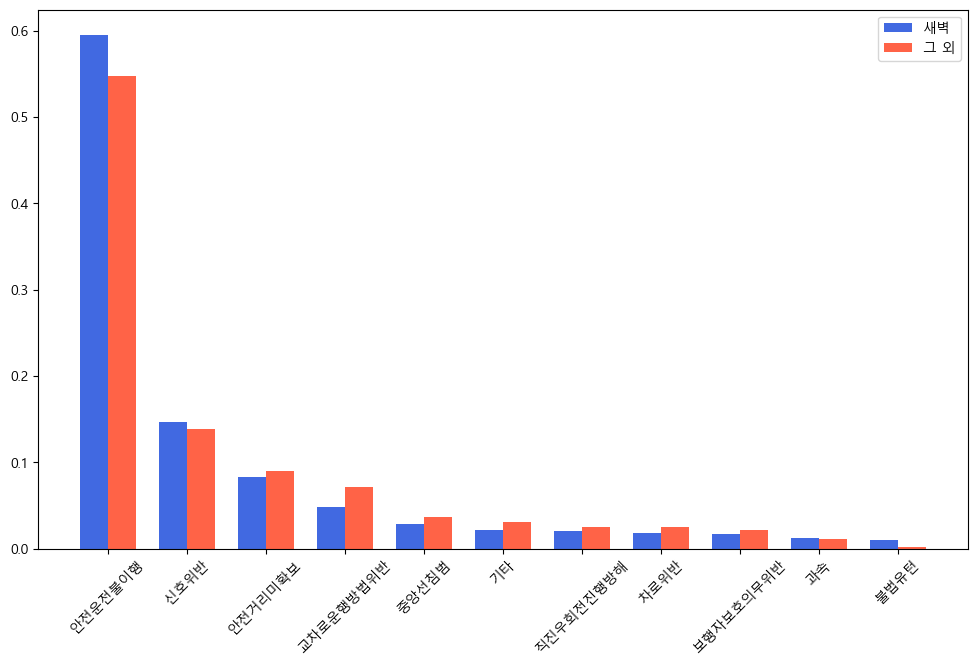

In [51]:

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

temp1 = temp[temp['새벽'] == '새벽']
idx = np.arange(len(temp1['법규위반']))
width=0.35

ax.bar(idx-width/2, temp1['prop'],
       color='royalblue',
       width=width, label = '새벽')

temp2 = temp[temp['새벽'] == '그 외']
ax.bar(idx+width/2, temp2['prop'],
       color='tomato',
       width=width, label = '그 외')

ax.legend()
ax.set_xticks(idx)
ax.set_xticklabels(temp1['법규위반'])
ax.tick_params(axis='x', rotation=45)

plt.show()

In [277]:
temp = train_df.groupby(['새벽','기상상태']).size().to_frame('count')
temp['prop'] = temp/ temp.groupby(level=0).sum()
temp = temp.reset_index().sort_values('prop', ascending=False)

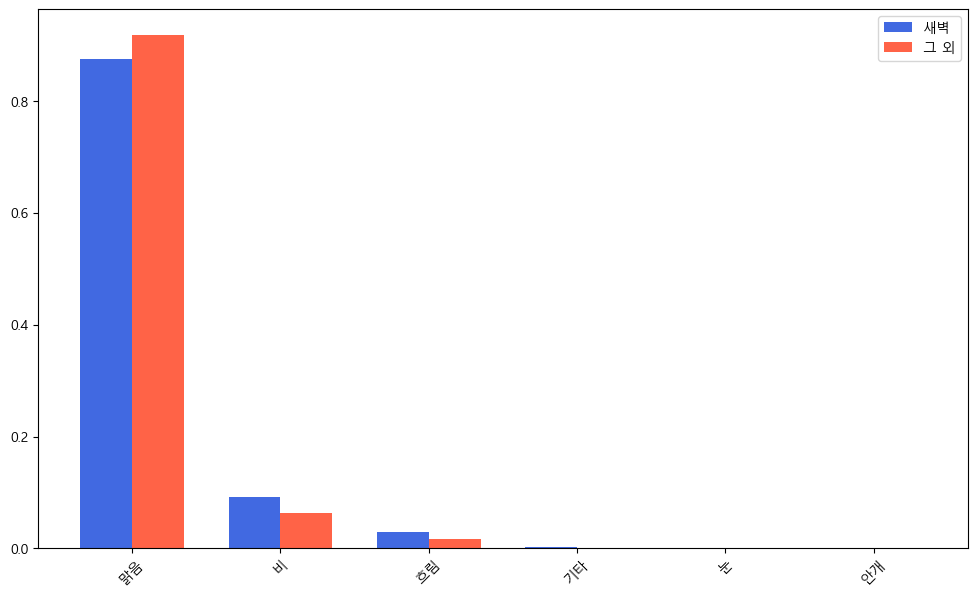

In [278]:

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

temp1 = temp[temp['새벽'] == '새벽']
idx = np.arange(len(temp1['기상상태']))
width=0.35

ax.bar(idx-width/2, temp1['prop'],
       color='royalblue',
       width=width, label = '새벽')

temp2 = temp[temp['새벽'] == '그 외']
ax.bar(idx+width/2, temp2['prop'],
       color='tomato',
       width=width, label = '그 외')

ax.legend()
ax.set_xticks(idx)
ax.set_xticklabels(temp1['기상상태'])
ax.tick_params(axis='x', rotation=45)

plt.show()

<Axes: xlabel='None-시간대', ylabel='가해운전자 차종'>

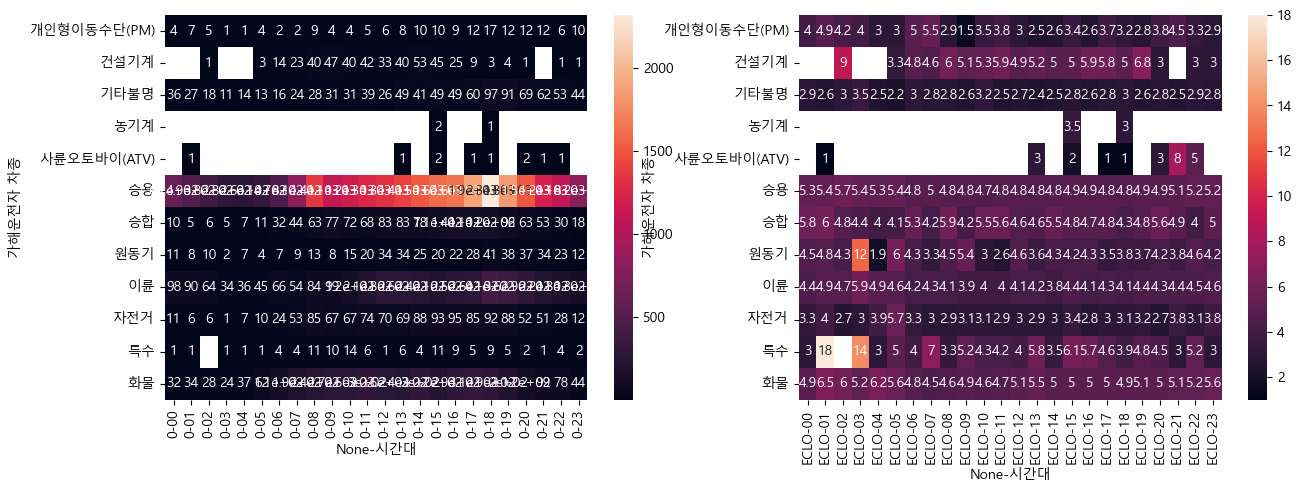

In [282]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
temp = train_df.groupby(['시간대', '가해운전자 차종']).size().reset_index().pivot(index = '가해운전자 차종', columns = '시간대')
sns.heatmap(temp, annot = True, ax = axes[0])

temp = train_df.groupby(['시간대', '가해운전자 차종'])['ECLO'].mean().reset_index().pivot(index = '가해운전자 차종', columns = '시간대')
sns.heatmap(temp, annot = True, ax = axes[1])

In [280]:
# temp1 = train_df[train_df['새벽'] == '새벽']
# temp2 = train_df[train_df['새벽'] == '그 외']

# temp1 = temp1.groupby('중상자수').size().to_frame('중상자수-새벽')
# temp2 = temp2.groupby('중상자수').size().to_frame('중상자수-그외')

# temp1['prop-새벽'] = temp1/ temp1.sum()
# temp2['prop-그외'] = temp2/ temp2.sum()

# temp1 = temp1.reset_index()
# temp2 = temp2.reset_index()

# temp = temp1.merge(temp2, how = 'outer')
# temp

In [281]:

# fig, ax = plt.subplots(1, 1, figsize=(12, 7))

# idx = np.arange(len(temp['중상자수']))
# width=0.35

# ax.bar(idx-width/2, temp['prop-새벽'],
#        color='royalblue',
#        width=width, label = '새벽')

# ax.bar(idx+width/2, temp['prop-그외'],
#        color='tomato',
#        width=width, label = '그 외')

# ax.legend()
# ax.set_xticks(idx)
# ax.set_xticklabels(temp['중상자수'])
# ax.tick_params(axis='x', rotation=45)

# plt.show()

### 2. 운전자 차종과의 관계
- 가해 운전자의 차종이 건설 기계, 화물처럼 큰 차량일 때 ECLO가 살짝 높은 편이다.
- 피해 차종
  - 농기계일 때 ECLO가 압도적으로 높지만, 발생 횟수가 극히 드물다.
  - 자전거, 보행자, 개인형이동수단 처럼 차량이 아닌 경우의 ECLO가 대체로 낮다.

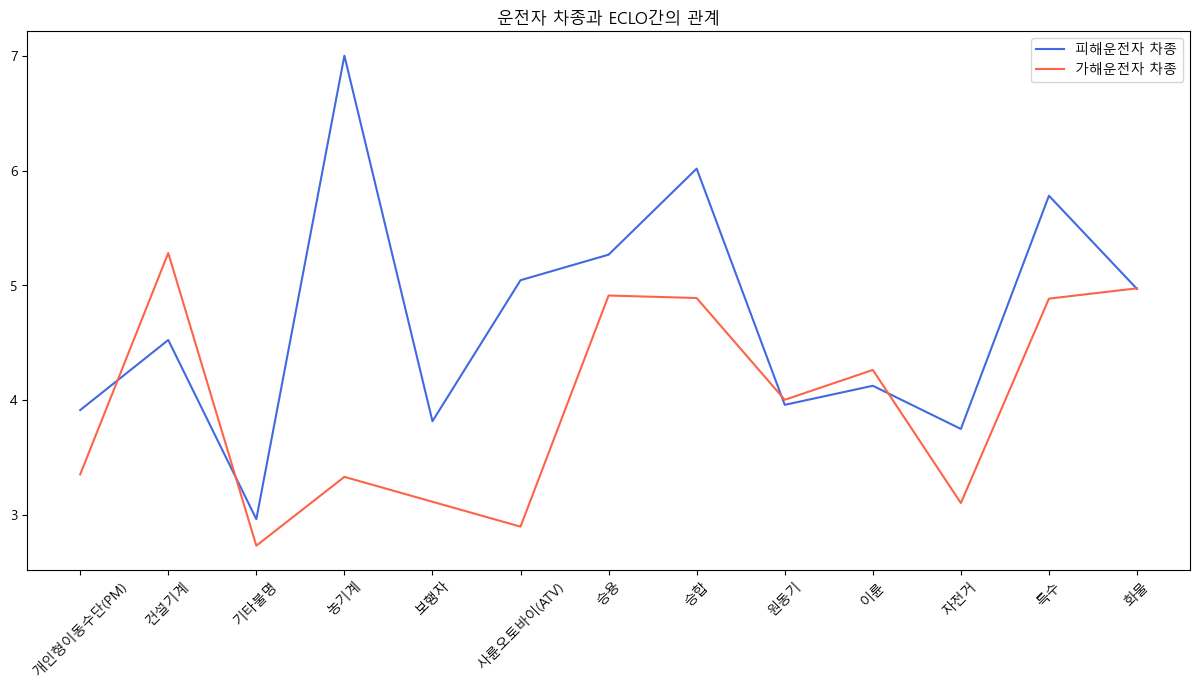

In [214]:
temp1 = train_df.groupby('피해운전자 차종')[['ECLO']].mean().reset_index()
temp2 = train_df.groupby('가해운전자 차종')[['ECLO']].mean().reset_index()

fig, ax = plt.subplots(1, figsize=(15,7))

ax.plot(temp1['피해운전자 차종'], temp1['ECLO'], color='royalblue', label = '피해운전자 차종')
ax.plot(temp2['가해운전자 차종'], temp2['ECLO'], color='tomato', label = '가해운전자 차종')

ax.legend()
ax.set_title('운전자 차종과 ECLO간의 관계')
ax.tick_params(axis='x', rotation=45)
plt.show()

In [215]:
train_df['피해운전자 차종'].value_counts()

피해운전자 차종
승용             20315
보행자             6833
이륜              5209
자전거             2145
화물              2047
승합              1015
원동기              581
개인형이동수단(PM)      164
건설기계             120
기타불명              86
특수                73
사륜오토바이(ATV)       22
농기계                8
Name: count, dtype: int64

In [216]:
train_df['가해운전자 차종'].value_counts()

가해운전자 차종
승용             26705
이륜              4091
화물              4040
승합              1376
자전거             1234
기타불명             978
원동기              462
건설기계             425
개인형이동수단(PM)      172
특수               113
사륜오토바이(ATV)       10
농기계                3
Name: count, dtype: int64

### 3. CCTV 개수와의 관계
- cctv 개수 - 사고 발생 빈도
  - 상관계수 0.75로, cctv가 많은 지역에서 사고도 많이 발생한다..ㅋㅋ
  - 번화가여서 cctv도 많고 그만큼 사고도 많은 것 같다.
- cctv 개수 - ECLO
  - 발생횟수가 아닌 ECLO로 확인해보니 상관계수가 거의 0으로 수렴한다.
  - cctv가 있는 특정 지역이 아닌 동 단위로 보다보니 영향력이 거의 없는 것으로 보인다.

In [80]:
cctv = pd.read_csv('data/external_open/대구 CCTV 정보.csv', encoding = 'cp949')
cctv.head()

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치연도
0,주차12,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 162,대구광역시 남구 대명동 903-13,35.838857,128.575418,안지랑네거리1 버스정류장,4,0,NaN,NaN,99.0,2010.0
1,주차13,대구광역시,남구,시도,NaN,봉덕로,3,대구광역시 남구 봉덕로 135,대구광역시 남구 봉덕동 853-8,35.844653,128.604619,효성백년가약,4,0,NaN,NaN,99.0,2013.0
2,주차14,대구광역시,남구,시도,NaN,대봉로,3,대구광역시 남구 봉덕로 134,대구광역시 남구 봉덕동 866-46,35.844183,128.604815,강변코오롱하늘채,4,0,NaN,NaN,99.0,2013.0
3,주차15,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 200,대구광역시 남구 대명동 2680-17,35.834798,128.585284,보성청록타운,4,0,NaN,NaN,99.0,2014.0
4,주차16,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 243,대구광역시 남구 봉덕동 1616,35.832728,128.588324,환경차고지,4,0,NaN,NaN,99.0,2014.0


In [ ]:
cctv = cctv.dropna(subset = '소재지지번주소')
cctv['동'] = cctv['소재지지번주소'].apply(lambda x : x.split(' ')[2])

train_df['동'] = train_df['시군구'].apply(lambda x : x.split(' ')[2])

In [283]:
temp1 = train_df['동'].value_counts().to_frame('사고 발생 횟수').reset_index()
temp2 = cctv.groupby('동').size().reset_index().rename(columns = {0 : 'cctv 개수'})
temp = temp1.merge(temp2, how= 'left')

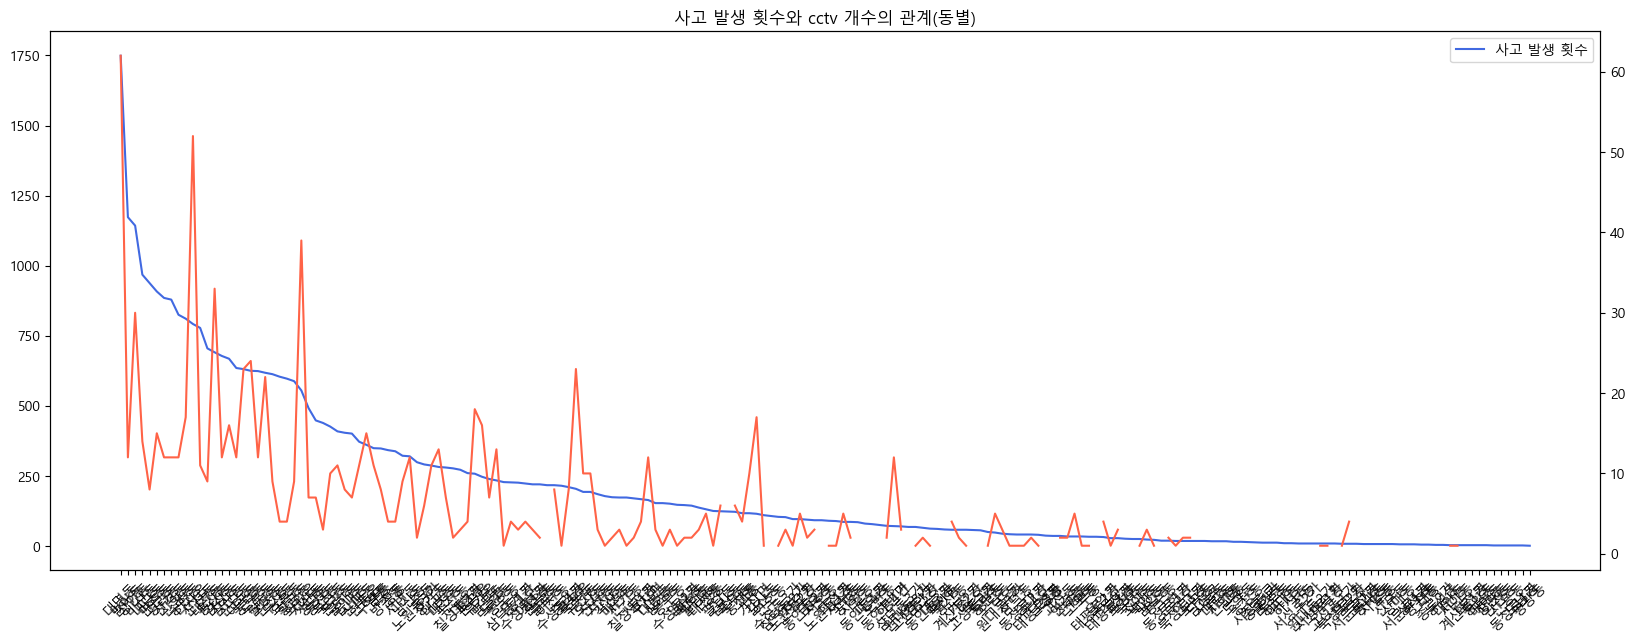

In [284]:
fig, ax = plt.subplots(1, figsize=(20,7))

ax.plot(temp['동'], temp['사고 발생 횟수'], color='royalblue', label = '사고 발생 횟수')

ax2 = ax.twinx()
ax2.plot(temp['동'], temp['cctv 개수'], color='tomato', label = 'cctv 개수')

ax.legend()
ax.set_title('사고 발생 횟수와 cctv 개수의 관계(동별)')
ax.tick_params(axis='x', rotation=45)
plt.show()

In [285]:
temp[['사고 발생 횟수', 'cctv 개수']].corr('spearman')

,사고 발생 횟수,cctv 개수
사고 발생 횟수,1.000000,0.752388
cctv 개수,0.752388,1.000000


In [220]:
temp1 = train_df.groupby('동')['ECLO'].mean().reset_index()
temp2 = cctv.groupby('동').size().reset_index().rename(columns = {0 : 'cctv 개수'})
temp = temp1.merge(temp2, how = 'left').sort_values('ECLO', ascending = False)

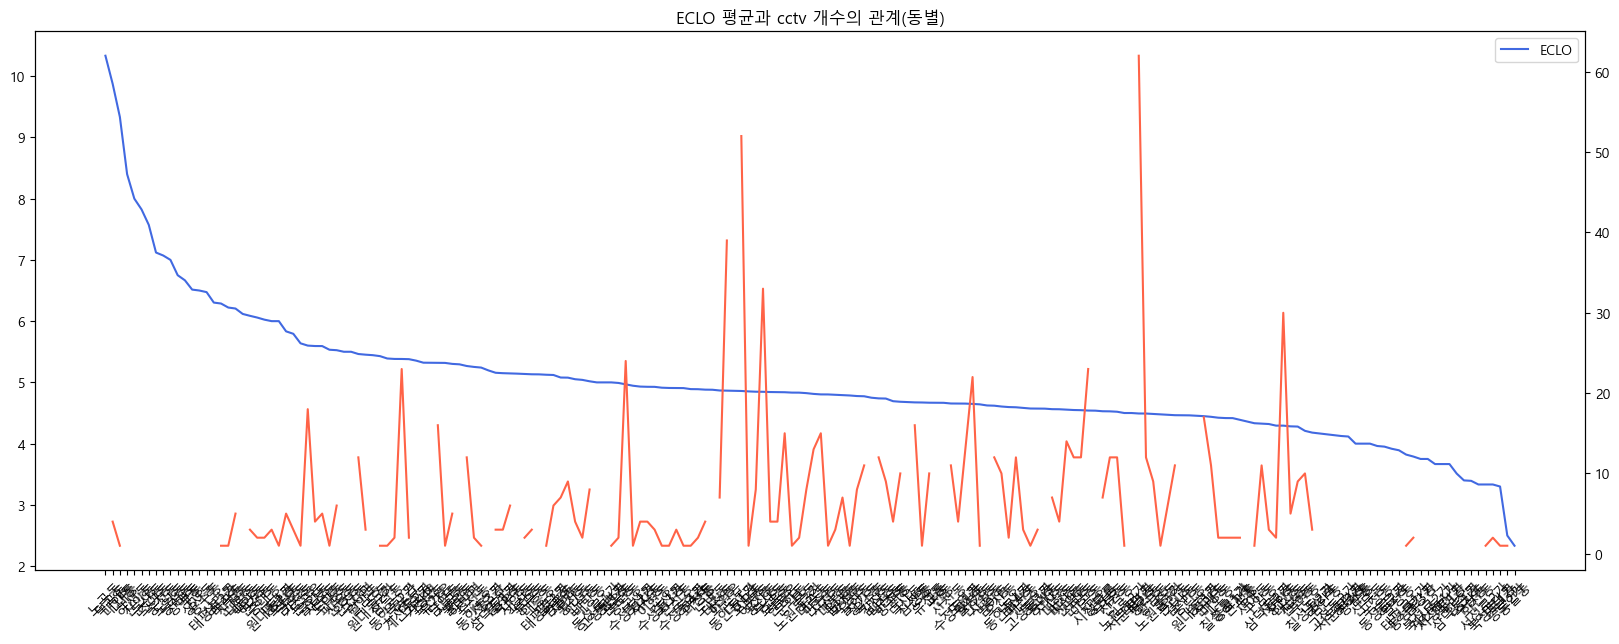

In [221]:
fig, ax = plt.subplots(1, figsize=(20,7))

ax.plot(temp['동'], temp['ECLO'], color='royalblue', label = 'ECLO')

ax2 = ax.twinx()
ax2.plot(temp['동'], temp['cctv 개수'], color='tomato', label = 'cctv 개수')

ax.legend()
ax.set_title('ECLO 평균과 cctv 개수의 관계(동별)')
ax.tick_params(axis='x', rotation=45)
plt.show()

In [223]:
train_df[['ECLO', 'cctv 개수']].corr('spearman')

,ECLO,cctv 개수
ECLO,1.000000,-0.019861
cctv 개수,-0.019861,1.000000


In [228]:
temp1 = train_df[train_df['법규위반'] == '과속'].groupby('동').size().to_frame('사고 발생 횟수').reset_index()
temp2 = cctv.groupby('동').size().reset_index().rename(columns = {0 : 'cctv 개수'})
temp = temp1.merge(temp2, how = 'left').sort_values('사고 발생 횟수', ascending=False)

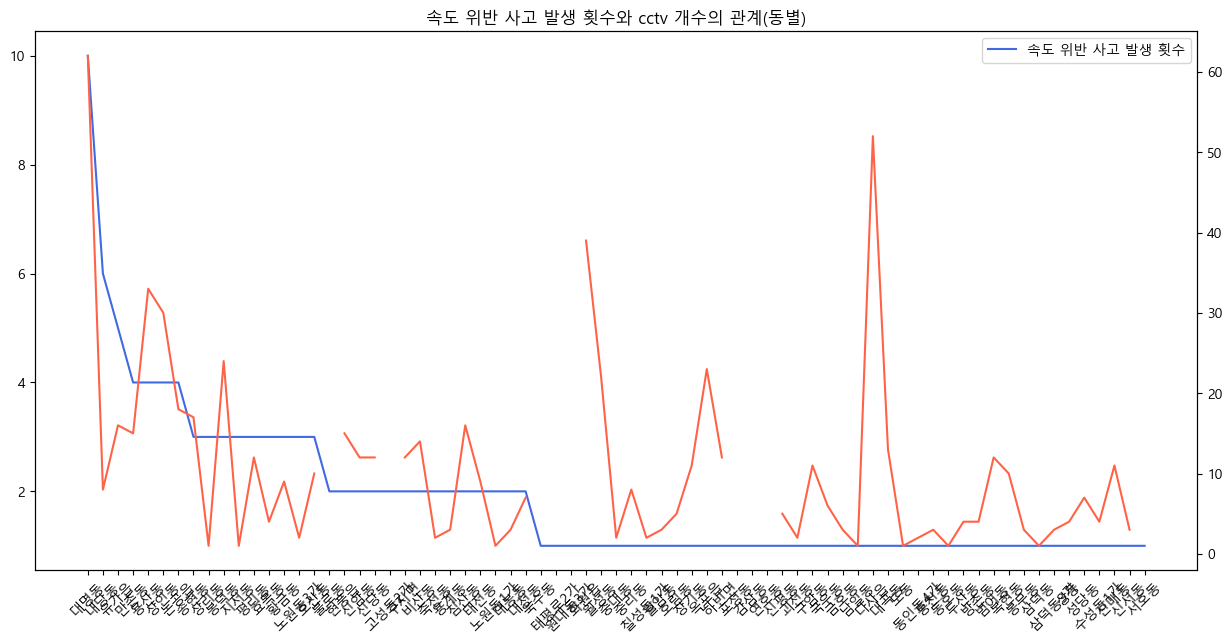

In [229]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.plot(temp['동'], temp['사고 발생 횟수'], color='royalblue', label = '속도 위반 사고 발생 횟수')

ax2 = ax.twinx()
ax2.plot(temp['동'], temp['cctv 개수'], color='tomato', label = 'cctv 개수')

ax.legend()
ax.set_title('속도 위반 사고 발생 횟수와 cctv 개수의 관계(동별)')
ax.tick_params(axis='x', rotation=45)
plt.show()

In [230]:
temp[['사고 발생 횟수', 'cctv 개수']].corr('spearman')

,사고 발생 횟수,cctv 개수
사고 발생 횟수,1.000000,0.314994
cctv 개수,0.314994,1.000000


In [88]:
# temp1 = train_df.groupby('부상자수').size().to_frame('빈도').reset_index()
# temp2 = train_df.groupby(['부상자수'])['cctv 개수'].mean().reset_index()
# temp = temp1.merge(temp2, how = 'left')

# fig, ax = plt.subplots(1, figsize = (12,7))
# ax.bar(x='부상자수', height ='빈도', data = temp)
# ax2 = ax.twinx()
# ax2.plot('부상자수', 'cctv 개수', data = temp, color = 'tomato')
# ax.set_xlabel('부상자수')
# ax.set_ylabel('cctv 개수 평균')

In [188]:
# gb = train_df.groupby(['가해운전자 연령_cat','피해운전자 연령_cat']).size()
# temp = pd.DataFrame(gb / gb.groupby(level=0).sum()).reset_index()
# temp.rename(columns = {0 : 'cnt'}, inplace =True)
# temp = temp.pivot(index = '가해운전자 연령_cat', columns = '피해운전자 연령_cat')
# sns.heatmap(temp, annot = True)
# plt.title('가해-피해운전자 연령 비율')

In [201]:
# fig, axes = plt.subplots(2,2, figsize = (20,10))
# temp = train_df[train_df['새벽'] == '새벽']
# temp2 = temp.groupby(['가해운전자 차종','피해운전자 차종']).size().reset_index().pivot(index = '가해운전자 차종', columns = '피해운전자 차종')
# sns.heatmap(temp2, annot = True, ax = axes[0][0])

# temp3 = temp.groupby(['가해운전자 차종','피해운전자 차종'])['ECLO'].median().reset_index().pivot(index = '가해운전자 차종', columns = '피해운전자 차종')
# sns.heatmap(temp3, annot = True, ax = axes[0][1])

# temp = train_df[train_df['새벽'] == '그 외']
# temp2 = temp.groupby(['가해운전자 차종','피해운전자 차종']).size().reset_index().pivot(index = '가해운전자 차종', columns = '피해운전자 차종')
# sns.heatmap(temp2, annot = True, ax = axes[1][0])

# temp3 = temp.groupby(['가해운전자 차종','피해운전자 차종'])['ECLO'].median().reset_index().pivot(index = '가해운전자 차종', columns = '피해운전자 차종')
# sns.heatmap(temp3, annot = True, ax = axes[1][1])